In [8]:
# If you haven't installed the bwb package yet, run the following command
# !pip install git+https://github.com/ottomossei/bwb

## import modules

In [9]:
import datetime
from bwb.db import LocalDB
import bwb.basicstrategy as bst
import bwb.indicator as indicator

## Load candlestick

In [10]:
issue = 'AAPL'
d = LocalDB()
candle = d.loader(issue, start = '2020/01/01', end = datetime.date.today())
candle

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-02,2020-01-02,74.059998,75.150002,73.797501,75.087502,74.207466,135480400
2020-01-03,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.486023,146322800
2020-01-06,2020-01-06,73.447502,74.989998,73.187500,74.949997,74.071579,118387200
2020-01-07,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.723213,108872000
2020-01-08,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.909149,132079200
...,...,...,...,...,...,...,...
2021-07-23,2021-07-23,147.550003,148.720001,146.919998,148.559998,148.559998,71361600
2021-07-26,2021-07-26,148.270004,149.830002,147.699997,148.990005,148.990005,72269700
2021-07-27,2021-07-27,149.119995,149.210007,145.550003,146.770004,146.770004,103580300


## Select basic strategy

In [11]:
# MACD Cross Strategy
strategy = bst.MACDCross
strategy.candle = candle

## backtest

In [12]:
tester = bst.Btest(
        data = candle,
        strategy = strategy,
        cash = 1000,
        commission = 0.00495,
        margin = 1.0,
        trade_on_close = True,
        exclusive_orders = True
        )
output = tester.run()
output

Start                     2020-01-02 00:00:00
End                       2021-07-29 00:00:00
Duration                    574 days 00:00:00
Exposure Time [%]                   61.712846
Equity Final [$]                  1624.787347
Equity Peak [$]                   1666.037347
Return [%]                          62.478735
Buy & Hold Return [%]               93.960375
Return (Ann.) [%]                   36.083463
Volatility (Ann.) [%]               32.237912
Sharpe Ratio                         1.119287
Sortino Ratio                        2.392514
Calmar Ratio                         2.249489
Max. Drawdown [%]                  -16.040736
Avg. Drawdown [%]                   -3.473154
Max. Drawdown Duration      301 days 00:00:00
Avg. Drawdown Duration       31 days 00:00:00
# Trades                                   15
Win Rate [%]                        53.333333
Best Trade [%]                      22.482237
Worst Trade [%]                     -5.042398
Avg. Trade [%]                    

## Save .html

In [13]:
p = tester.plot(issue=issue)

## Show with mplfinance

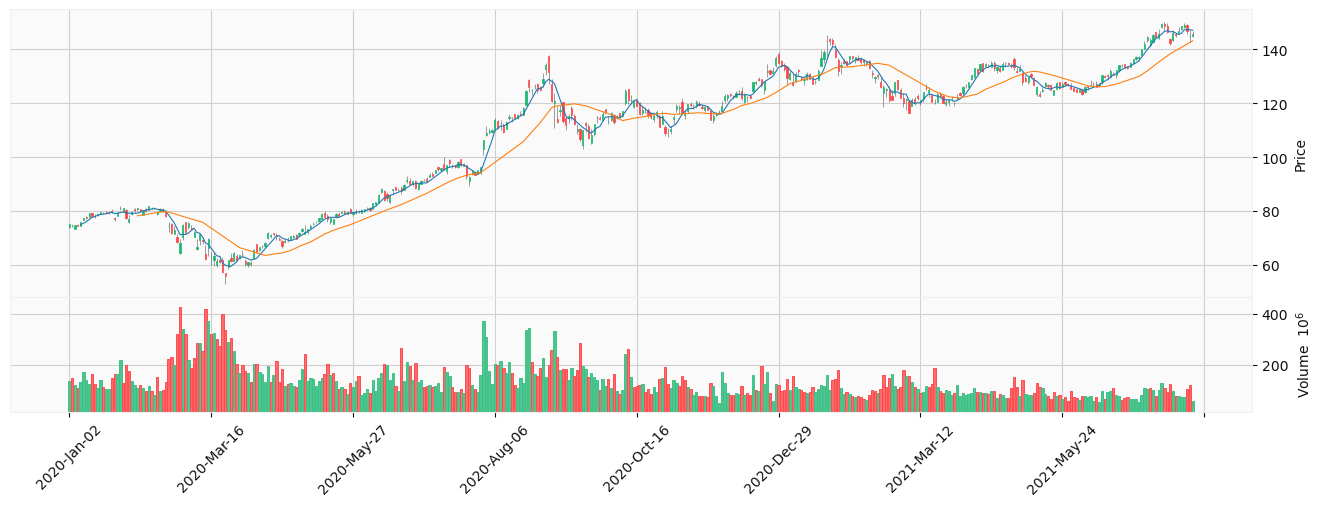

In [14]:
import mplfinance as mpf
# Show with Jupyter Notebook
mpf.plot(candle, type='candle', figratio=(12,4),
         volume=True, mav=(5, 25), style='yahoo')